In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *
from cipher.vigenere import *
from cipher.playfair import *
from cipher.column_transposition import *
from support.text_prettify import *
from support.plot_frequency_histogram import *

In [3]:
# import logger as myl
# import logging
# myl.logger.setLevel(logging.DEBUG)
# mylg = logging.getLogger('cipherbreak')
import logging
from logger import logger

import re
from datetime import datetime
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import kendalltau

In [4]:
logger.setLevel(logging.DEBUG)

In [5]:
def commonest_alphabet(text):
    counts = collections.Counter(sanitise(text))
    letters = cat(p[0] for p in counts.most_common())
    return cat(deduplicate(letters + string.ascii_lowercase))

In [6]:
def random_ciphertext(message_length):
    sample_start = random.randint(0, corpus_length - message_length)
    sample = corpus[sample_start:(sample_start + message_length)]
    key = list(string.ascii_lowercase)
    random.shuffle(key)
    key = cat(key)
    ciphertext = keyword_encipher(sample, key)
    return key, ciphertext

In [7]:
def log_parse(text, verbose=False):
    parts = text.split(' - ')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S,%f")
    blurb = parts[-1]
    worker = int(re.search('worker (\d+)', blurb).group(1))
    iteration = int(re.search('iteration (\d+)', blurb).group(1))
    fitness = float(re.search('fitness (-?\d+\.\d+)', blurb).group(1))
    if verbose:
        ca = re.search('current alphabet (\w+)', blurb).group(1)
        pa = re.search('plain alphabet (\w+)', blurb).group(1)
        return {'time': dt, 'worker': worker, 'iteration': iteration, 'fitness': fitness, 
                'cipher_alphabet': ca, 'plain_alphabet': pa}
    else:
        return {'time': dt, 'worker': worker, 'iteration': iteration, 'fitness': fitness}

In [8]:
# ps = [log_parse(line, verbose=True) for line in open('cipher.log').readlines()[:10]]
# df = pd.DataFrame(ps)
# df = df.set_index(['worker', 'iteration']).sort_index()
# df[['fitness', 'plain_alphabet', 'cipher_alphabet']].to_csv('test.csv', header=True)


In [9]:
def dump_result(starttime, filename, verbose=False):
    parsed = [log_parse(line, verbose=verbose) for line in open('cipher.log')]
    trace = pd.DataFrame([p for p in parsed if p['time'] > starttime])
    trace = trace.set_index(['worker', 'iteration']).sort_index()
    workers = list(sorted(set(trace.index.get_level_values(0))))
    if verbose:
        trace[['fitness', 'plain_alphabet', 'cipher_alphabet']].to_csv(filename, header=True)
    else:
        trace.fitness.to_csv(filename, header=True)
    return workers, trace

In [10]:
plain_alpha = cat(p[0] for p in english_counts.most_common())
plain_alpha

'etoainhsrdlumwycfgpbvkxjqz'

In [11]:
def unscramble_alphabet(cipher_alphabet, plain_alphabet):
    mapping = {p: c for p, c in zip(plain_alphabet, cipher_alphabet)}
    unscrambled = cat(mapping[p] for p in sorted(mapping))
    return unscrambled

In [12]:
# pt = sanitise(open('../2017/8b.plaintext').read())
corpus = sanitise(open('../support/sherlock-holmes.txt').read())
corpus_length = len(corpus)
pt = corpus
pt[:20]

'theadventuresofsherl'

# Development

In [13]:
Pletters(pt)

-542391.5369482826

In [14]:
Ptrigrams(pt)

-1471429.4753165497

In [15]:
commonest_alphabet(pt)

'etaoihnsrdlumwcyfgpbvkxjqz'

In [16]:
k, c = random_ciphertext(30)
k, c, keyword_decipher(c, k)

('qlkwrmaznifhoxjgspvudybtec',
 'jogqxexjbnmejdqprbrhhdgnxejdph',
 'ompanynowifyouarewellupinyourl')

In [17]:
pt = sanitise(open('../2017/8b.plaintext').read())
pt[:20]

'yearningforrespiteth'

In [44]:
ct_key = list(string.ascii_lowercase)
random.shuffle(ct_key)
ct_key = cat(ct_key)
# ct = keyword_encipher(pt, 'arcanaimperii')
ct = keyword_encipher(pt, ct_key)
ct[:100]

'guefwqwydaffujhqlulmufanewjjsddufutejtegjlsfwutqwlabuupjewtbuupjqwlanawlmjbqlmxeiyexsjewtlmuxeiutawq'

In [11]:
sa_cipher_alphabet, score = simulated_annealing_break(ct, plain_alphabet=plain_alpha, cipher_alphabet=ct_alpha)
sa_cipher_alphabet, score

('itkabjesqnguhwycmplrvfxdoz', -14681.308607565503)

In [75]:
cat(p[1] for p in sorted(zip(plain_alpha, sa_cipher_alphabet[0])))

'arcnimpebdfghjkloqstuvwxyz'

In [10]:
keyword_cipher_alphabet_of('arcanaimperii')

'arcnimpebdfghjkloqstuvwxyz'

In [10]:
!ls *log

cipher.log  enigma.log


In [15]:
recs = open('cipher.log').read().splitlines()
recs[:5]

['2018-12-05 18:27:56,697 - cipherbreak - DEBUG - Simulated annealing worker 8: iteration 0, temperature 200, current alphabet itakbjsqenguhcpmwylvrfxodz, plain alphabet etoainhsrdlumwycfgpbvkxjqz, current_fitness -17464.568516864027, best_plaintext geosninychsseapitetreshmonaauccesedoadogatusnedint',
 '2018-12-05 18:27:56,698 - cipherbreak - DEBUG - Simulated annealing worker 0: iteration 0, temperature 200, current alphabet itakbjsqenguhcpmwylvrfxodz, plain alphabet etoainhsrdlumwycfgpbvkxjqz, current_fitness -17464.568516864027, best_plaintext geosninycassehkitetresamonhhuccesedohdoghtusnedint',
 '2018-12-05 18:27:56,698 - cipherbreak - DEBUG - Simulated annealing worker 2: iteration 0, temperature 200, current alphabet itakbjsqenguhcpmwylvrfxodz, plain alphabet etoainhsrdlumwycfgpbvkxjqz, current_fitness -17464.568516864027, best_plaintext geosnhnycasseiphtetresamoniiuccesedoidogitusnedhnt',
 '2018-12-05 18:27:56,698 - cipherbreak - DEBUG - Simulated annealing worker 1: iteration 0

In [46]:
log_parse(recs[0])

{'time': datetime.datetime(2018, 12, 5, 18, 27, 56, 697000),
 'worker': 8,
 'iteration': 0,
 'fitness': -17464.568516864027}

In [47]:
parsed = [log_parse(line) for line in open('cipher.log')]
parsed[10:]

[{'time': datetime.datetime(2018, 12, 5, 18, 27, 57, 557000),
  'worker': 8,
  'iteration': 500,
  'fitness': -19506.212009034196},
 {'time': datetime.datetime(2018, 12, 5, 18, 27, 57, 635000),
  'worker': 9,
  'iteration': 500,
  'fitness': -18038.95559884915},
 {'time': datetime.datetime(2018, 12, 5, 18, 27, 57, 993000),
  'worker': 5,
  'iteration': 500,
  'fitness': -17327.223609157583},
 {'time': datetime.datetime(2018, 12, 5, 18, 27, 57, 995000),
  'worker': 3,
  'iteration': 500,
  'fitness': -18946.41644162794},
 {'time': datetime.datetime(2018, 12, 5, 18, 27, 57, 996000),
  'worker': 2,
  'iteration': 500,
  'fitness': -21014.221984327247},
 {'time': datetime.datetime(2018, 12, 5, 18, 27, 57, 998000),
  'worker': 7,
  'iteration': 500,
  'fitness': -20093.45361142934},
 {'time': datetime.datetime(2018, 12, 5, 18, 27, 57, 998000),
  'worker': 4,
  'iteration': 500,
  'fitness': -20003.348090823332},
 {'time': datetime.datetime(2018, 12, 5, 18, 27, 57, 999000),
  'worker': 1,
  

In [56]:
threshold = datetime(2018, 12, 6, 1)
trace = pd.DataFrame([p for p in parsed if p['time'] > threshold])
trace = trace.set_index(['worker', 'iteration']).sort_index()
trace

fitness                    time
worker iteration                                      
0      0         -17464.568517 2018-12-05 19:32:30.307
       500       -19456.419361 2018-12-05 19:32:31.653
       1000      -19192.661068 2018-12-05 19:32:32.663
       1500      -21362.030854 2018-12-05 19:32:33.684
       2000      -19439.674465 2018-12-05 19:32:35.103
       2500      -19494.922209 2018-12-05 19:32:36.676
       3000      -19409.258504 2018-12-05 19:32:37.862
       3500      -19375.464977 2018-12-05 19:32:39.191
       4000      -18553.631818 2018-12-05 19:32:40.468
       4500      -18842.347858 2018-12-05 19:32:41.331
       5000      -19347.171865 2018-12-05 19:32:42.396
       5500      -18460.352808 2018-12-05 19:32:43.163
       6000      -18814.968213 2018-12-05 19:32:43.981
       6500      -18298.223867 2018-12-05 19:32:45.198
       7000      -17555.991450 2018-12-05 19:32:46.534
       7500      -17280.010163 2018-12-05 19:32:47.825
       8000      -17208.764191 2018-12-05 19:32:49.129
       8500      -17048.836850 2018-12-05 19:32:50.419
       9000      -17309.885703 2018-12-05 19:32:51.718
       9500      -15935.254778 2018-12-05 19:32:53.030
       10000     -15694.589652 2018-12-05 19:32:54.328
       10500     -15582.878774 2018-12-05 19:32:55.608
       11000     -15314.579171 2018-12-05 19:32:56.900
       11500     -14942.449992 2018-12-05 19:32:58.179
       12000     -15471.335261 2018-12-05 19:32:59.467
       12500     -14977.106397 2018-12-05 19:33:00.743
       13000     -14954.236486 2018-12-05 19:33:02.033
       13500     -14762.142171 2018-12-05 19:33:03.314
       14000     -14932.523832 2018-12-05 19:33:04.605
       14500     -14978.652512 2018-12-05 19:33:05.896
...                        ...                     ...
9      5000      -19310.352956 2018-12-05 19:32:43.791
       5500      -17503.410891 2018-12-05 19:32:45.106
       6000      -17163.013191 2018-12-05 19:32:46.422
       6500      -16941.399877 2018-12-05 19:32:47.714
       7000      -16395.145359 2018-12-05 19:32:49.016
       7500      -16250.722026 2018-12-05 19:32:50.303
       8000      -16750.905526 2018-12-05 19:32:51.601
       8500      -17732.539610 2018-12-05 19:32:52.890
       9000      -16435.368812 2018-12-05 19:32:54.188
       9500      -16910.471934 2018-12-05 19:32:55.472
       10000     -15910.365821 2018-12-05 19:32:56.769
       10500     -15936.659327 2018-12-05 19:32:58.053
       11000     -15246.633564 2018-12-05 19:32:59.346
       11500     -15256.022959 2018-12-05 19:33:00.622
       12000     -14985.884198 2018-12-05 19:33:01.923
       12500     -14689.841559 2018-12-05 19:33:03.218
       13000     -14822.625860 2018-12-05 19:33:04.515
       13500     -15013.715132 2018-12-05 19:33:05.634
       14000     -14797.257898 2018-12-05 19:33:06.517
       14500     -14895.606255 2018-12-05 19:33:07.476
       15000     -14986.753045 2018-12-05 19:33:08.288
       15500     -14696.829929 2018-12-05 19:33:09.165
       16000     -14681.308608 2018-12-05 19:33:09.995
       16500     -14681.308608 2018-12-05 19:33:10.743
       17000     -14689.841559 2018-12-05 19:33:11.510
       17500     -14700.923210 2018-12-05 19:33:12.254
       18000     -14681.308608 2018-12-05 19:33:13.067
       18500     -14681.308608 2018-12-05 19:33:13.918
       19000     -14681.308608 2018-12-05 19:33:14.660
       19500     -14681.308608 2018-12-05 19:33:15.356

[400 rows x 2 columns]

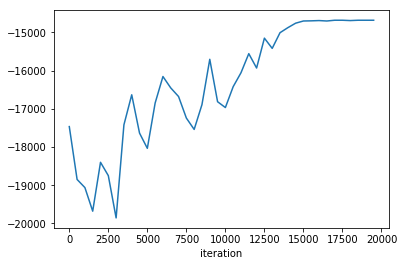

In [60]:
trace1.loc[0].fitness.plot()

In [64]:
workers = list(sorted(set(trace1.index.get_level_values(0))))
workers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

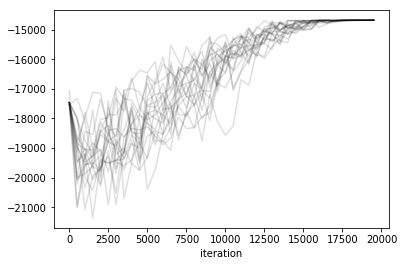

In [71]:
fig, ax = plt.subplots()
for w in workers:
    trace1.loc[w].fitness.plot(ax=ax, color='#00000020')
    trace2.loc[w].fitness.plot(ax=ax, color='#00000020')

# Experiments

In [113]:
ct_key, ct = random_ciphertext(2000)
ct_alpha = commonest_alphabet(ct)
collections.Counter(sanitise(ct)).most_common()[-5:]

[('z', 25), ('g', 23), ('n', 1), ('q', 1), ('w', 1)]

-6762.002908994096


('eolbrvxtpqzuhdyswcmkigfnja',
 'rkyepdtmcbuihfjlvxsogznqwa',
 'eolbrvxtpqzuhdyswcmkigfnja',
 1.0)

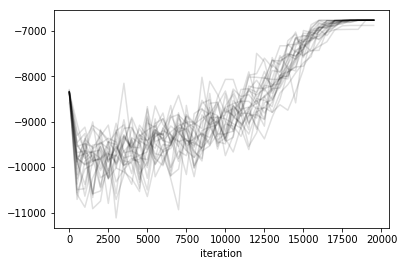

In [114]:
start_time = datetime.now()
found_cipher_alphabet, score = simulated_annealing_break(
    ct, 
    fitness=Ptrigrams,
    swap_index_finder=gaussian_swap_index,
    plain_alphabet=plain_alpha, cipher_alphabet=ct_alpha,
    workers=24)
print(score)
# workers, trace = dump_result(start_time, 'sa-given-trigram-gaussian.csv', verbose=True)
workers, trace = dump_result(start_time, 'test.csv', verbose=True)

fig, ax = plt.subplots()
for w in workers:
    trace.loc[w].fitness.plot(ax=ax, color='#00000020')

( ct_key, found_cipher_alphabet, 
 unscramble_alphabet(found_cipher_alphabet, plain_alpha), 
 kendalltau([ord(c) for c in unscramble_alphabet(found_cipher_alphabet, plain_alpha)], [ord(c) for c in ct_key])[0]
)

-2494.5491330863815


('eolbrvxtpqzuhdyswcmkigfnja',
 'yxhursvdtwgbjmeoqcpkizfnla',
 0.05230769230769231)

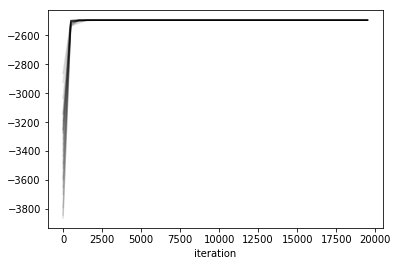

In [115]:
start_time = datetime.now()
found_cipher_alphabet, score = monoalphabetic_break_hillclimbing_mp(
    ct, 
    swap_index_finder=uniform_swap_index, 
    workers=24)
print(score)
workers, trace = dump_result(start_time, 'hillclimbing-random-unigram-uniform.csv')

fig, ax = plt.subplots()
for w in workers:
    trace.loc[w].fitness.plot(ax=ax, color='#00000020')

ct_key, found_cipher_alphabet, kendalltau([ord(c) for c in found_cipher_alphabet], [ord(c) for c in ct_key])[0]

-6762.002908994096


('eolbrvxtpqzuhdyswcmkigfnja', 'eolbrvxtpqzuhdyswcmkigfnja', 1.0)

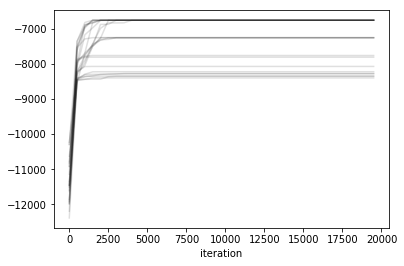

In [116]:
start_time = datetime.now()
found_cipher_alphabet, score = monoalphabetic_break_hillclimbing_mp(
    ct, 
    fitness=Ptrigrams,
    swap_index_finder=uniform_swap_index, 
    workers=24)
print(score)
workers, trace = dump_result(start_time, 'hillclimbing-random-trigram-uniform.csv')

fig, ax = plt.subplots()
for w in workers:
    trace.loc[w].fitness.plot(ax=ax, color='#00000020')

ct_key, found_cipher_alphabet, kendalltau([ord(c) for c in found_cipher_alphabet], [ord(c) for c in ct_key])[0]    

-6762.002908994096


('eolbrvxtpqzuhdyswcmkigfnja',
 'rkyepdtmcbuihfjlvxsogznqwa',
 'eolbrvxtpqzuhdyswcmkigfnja',
 1.0)

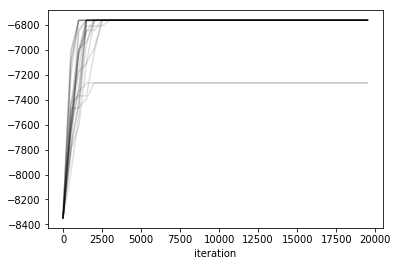

In [117]:
start_time = datetime.now()
found_cipher_alphabet, score = monoalphabetic_break_hillclimbing_mp(
    ct, 
    fitness=Ptrigrams,
    swap_index_finder=uniform_swap_index,
    plain_alphabet=plain_alpha, cipher_alphabet=ct_alpha,
    workers=24)
print(score)
workers, trace = dump_result(start_time, 'hillclimbing-given-trigram-uniform.csv', verbose=True)

fig, ax = plt.subplots()
for w in workers:
    trace.loc[w].fitness.plot(ax=ax, color='#00000020')


( ct_key, found_cipher_alphabet, 
 unscramble_alphabet(found_cipher_alphabet, plain_alpha), 
 kendalltau([ord(c) for c in unscramble_alphabet(found_cipher_alphabet, plain_alpha)], [ord(c) for c in ct_key])[0]
)

-6762.002908994096


('eolbrvxtpqzuhdyswcmkigfnja',
 'rkyepdtmcbuihfjlvxsogznqwa',
 'eolbrvxtpqzuhdyswcmkigfnja',
 1.0)

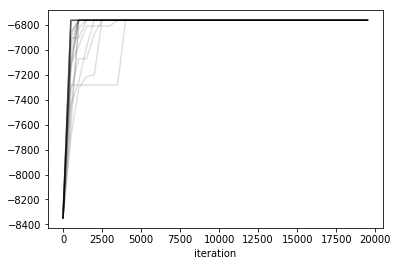

In [118]:
start_time = datetime.now()
found_cipher_alphabet, score = monoalphabetic_break_hillclimbing_mp(
    ct, 
    fitness=Ptrigrams,
    swap_index_finder=gaussian_swap_index,
    plain_alphabet=plain_alpha, cipher_alphabet=ct_alpha,
    workers=24)
print(score)
workers, trace = dump_result(start_time, 'hillclimbing-given-trigram-gaussian.csv')

fig, ax = plt.subplots()
for w in workers:
    trace.loc[w].fitness.plot(ax=ax, color='#00000020')

( ct_key, found_cipher_alphabet, 
 unscramble_alphabet(found_cipher_alphabet, plain_alpha), 
 kendalltau([ord(c) for c in unscramble_alphabet(found_cipher_alphabet, plain_alpha)], [ord(c) for c in ct_key])[0]
)


-2494.5491330863815


('eolbrvxtpqzuhdyswcmkigfnja',
 'yxhursvdtqgbjmeoncpkizfwla',
 0.015384615384615385)

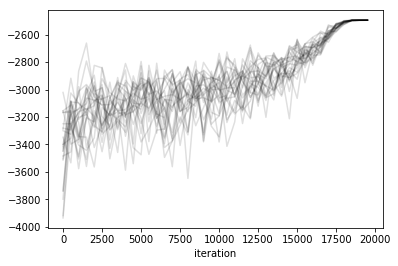

In [119]:
start_time = datetime.now()
found_cipher_alphabet, score = simulated_annealing_break(
    ct, 
    swap_index_finder=uniform_swap_index,
    fitness=Pletters,
    workers=24)
print(score)
workers, trace = dump_result(start_time, 'sa-random-unigram-uniform.csv')

fig, ax = plt.subplots()
for w in workers:
    trace.loc[w].fitness.plot(ax=ax, color='#00000020')

( ct_key, found_cipher_alphabet, 
 kendalltau([ord(c) for c in found_cipher_alphabet], [ord(c) for c in ct_key])[0]
)

-6762.002908994096


('eolbrvxtpqzuhdyswcmkigfnja', 'eolbrvxtpqzuhdyswcmkigfnja', 1.0)

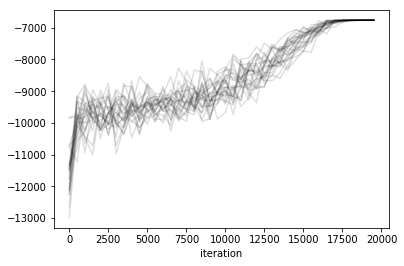

In [120]:
start_time = datetime.now()
found_cipher_alphabet, score = simulated_annealing_break(
    ct, 
    fitness=Ptrigrams,
    swap_index_finder=uniform_swap_index, 
    workers=24)
print(score)
workers, trace = dump_result(start_time, 'sa-random-trigram-uniform.csv')

fig, ax = plt.subplots()
for w in workers:
    trace.loc[w].fitness.plot(ax=ax, color='#00000020')

( ct_key, found_cipher_alphabet, 
 kendalltau([ord(c) for c in found_cipher_alphabet], [ord(c) for c in ct_key])[0]
)

-6762.002908994096


('eolbrvxtpqzuhdyswcmkigfnja', 'eolbrvxtpqzuhdyswcmkigfnja', 1.0)

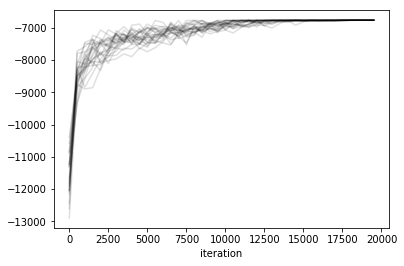

In [121]:
start_time = datetime.now()
found_cipher_alphabet, score = simulated_annealing_break(
    ct, 
    fitness=Ptrigrams,
    swap_index_finder=uniform_swap_index, 
    initial_temperature=50,
    workers=24)
print(score)
workers, trace = dump_result(start_time, 'sa-random-trigram-uniform-50.csv')

fig, ax = plt.subplots()
for w in workers:
    trace.loc[w].fitness.plot(ax=ax, color='#00000020')

( ct_key, found_cipher_alphabet, 
 kendalltau([ord(c) for c in found_cipher_alphabet], [ord(c) for c in ct_key])[0]
)

-6762.002908994096


('eolbrvxtpqzuhdyswcmkigfnja',
 'rkyepdtmcbuihfjlvxsogznqwa',
 'eolbrvxtpqzuhdyswcmkigfnja',
 1.0)

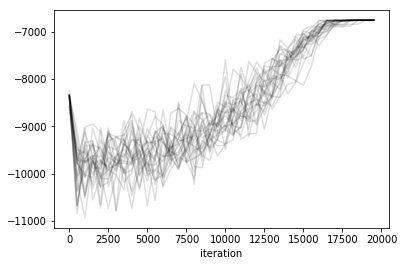

In [122]:
start_time = datetime.now()
found_cipher_alphabet, score = simulated_annealing_break(
    ct, 
    fitness=Ptrigrams,
    swap_index_finder=uniform_swap_index,
    plain_alphabet=plain_alpha, cipher_alphabet=ct_alpha,
    workers=24)
print(score)
workers, trace = dump_result(start_time, 'sa-given-trigram-uniform.csv')

fig, ax = plt.subplots()
for w in workers:
    trace.loc[w].fitness.plot(ax=ax, color='#00000020')

( ct_key, found_cipher_alphabet, 
 unscramble_alphabet(found_cipher_alphabet, plain_alpha), 
 kendalltau([ord(c) for c in unscramble_alphabet(found_cipher_alphabet, plain_alpha)], [ord(c) for c in ct_key])[0]
)

-6762.002908994096


('eolbrvxtpqzuhdyswcmkigfnja',
 'rkyepdtmcbuihfjlvxsogznqwa',
 'eolbrvxtpqzuhdyswcmkigfnja',
 1.0)

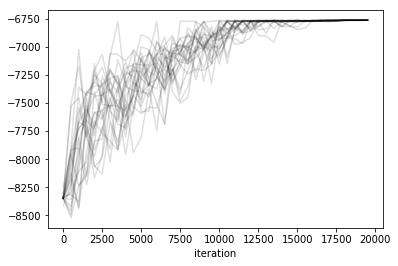

In [123]:
start_time = datetime.now()
found_cipher_alphabet, score = simulated_annealing_break(
    ct, 
    fitness=Ptrigrams,
    swap_index_finder=uniform_swap_index,
    plain_alphabet=plain_alpha, cipher_alphabet=ct_alpha,
    initial_temperature=50,
    workers=24)
print(score)
workers, trace = dump_result(start_time, 'sa-given-trigram-uniform-50.csv')

fig, ax = plt.subplots()
for w in workers:
    trace.loc[w].fitness.plot(ax=ax, color='#00000020')

( ct_key, found_cipher_alphabet, 
 unscramble_alphabet(found_cipher_alphabet, plain_alpha), 
 kendalltau([ord(c) for c in unscramble_alphabet(found_cipher_alphabet, plain_alpha)], [ord(c) for c in ct_key])[0]
)

-6762.002908994096


('eolbrvxtpqzuhdyswcmkigfnja',
 'rkyepdtmcbuihfjlvxsogznqwa',
 'eolbrvxtpqzuhdyswcmkigfnja',
 1.0)

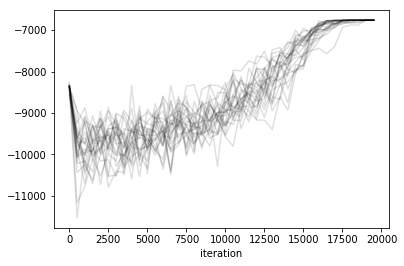

In [124]:
start_time = datetime.now()
found_cipher_alphabet, score = simulated_annealing_break(
    ct, 
    fitness=Ptrigrams,
    swap_index_finder=gaussian_swap_index,
    plain_alphabet=plain_alpha, cipher_alphabet=ct_alpha,
    workers=24)
print(score)
workers, trace = dump_result(start_time, 'sa-given-trigram-gaussian.csv', verbose=True)

fig, ax = plt.subplots()
for w in workers:
    trace.loc[w].fitness.plot(ax=ax, color='#00000020')

( ct_key, found_cipher_alphabet, 
 unscramble_alphabet(found_cipher_alphabet, plain_alpha), 
 kendalltau([ord(c) for c in unscramble_alphabet(found_cipher_alphabet, plain_alpha)], [ord(c) for c in ct_key])[0]
)

-6762.002908994096


('eolbrvxtpqzuhdyswcmkigfnja',
 'rkyepdtmcbuihfjlvxsogznqwa',
 'eolbrvxtpqzuhdyswcmkigfnja',
 1.0)

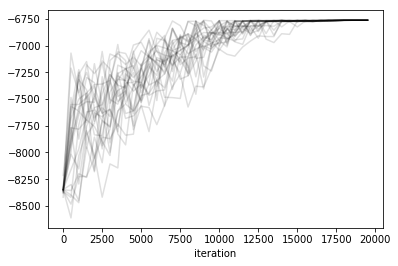

In [125]:
start_time = datetime.now()
found_cipher_alphabet, score = simulated_annealing_break(
    ct, 
    fitness=Ptrigrams,
    swap_index_finder=gaussian_swap_index,
    plain_alphabet=plain_alpha, cipher_alphabet=ct_alpha,
    initial_temperature=50,
    workers=24)
print(score)
workers, trace = dump_result(start_time, 'sa-given-trigram-gaussian-50.csv', verbose=True)

fig, ax = plt.subplots()
for w in workers:
    trace.loc[w].fitness.plot(ax=ax, color='#00000020')

( ct_key, found_cipher_alphabet, 
 unscramble_alphabet(found_cipher_alphabet, plain_alpha), 
 kendalltau([ord(c) for c in unscramble_alphabet(found_cipher_alphabet, plain_alpha)], [ord(c) for c in ct_key])[0]
)

In [126]:
import glob

In [127]:
for f in glob.glob("*unigram*.csv"):
    df = pd.read_csv(f)
    print(df.fitness.max(), df.fitness.min(), f)

-2494.549133086381 -3935.561885011543 sa-random-unigram-uniform.csv
-2494.549133086381 -3862.1721721032586 hillclimbing-random-unigram-uniform.csv


In [128]:
for f in glob.glob("*trigram*.csv"):
    df = pd.read_csv(f)
    print(df.fitness.max(), df.fitness.min(), f)

-6762.002908994095 -12382.205332762649 hillclimbing-random-trigram-uniform.csv
-6762.002908994095 -8523.074815108963 sa-given-trigram-uniform-50.csv
-6762.002908994095 -12897.908909587839 sa-random-trigram-uniform-50.csv
-6762.002908994095 -8347.978847763903 hillclimbing-given-trigram-uniform.csv
-6762.002908994095 -11531.53274337052 sa-given-trigram-gaussian.csv
-6762.002908994095 -8347.978847763903 hillclimbing-given-trigram-gaussian.csv
-6762.002908994095 -12999.784533122312 sa-random-trigram-uniform.csv
-6762.002908994095 -8612.777635758275 sa-given-trigram-gaussian-50.csv
-6762.002908994095 -10935.574066404368 sa-given-trigram-uniform.csv
